In [ ]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter= 16).download(quality_bitmask = 'hardest')

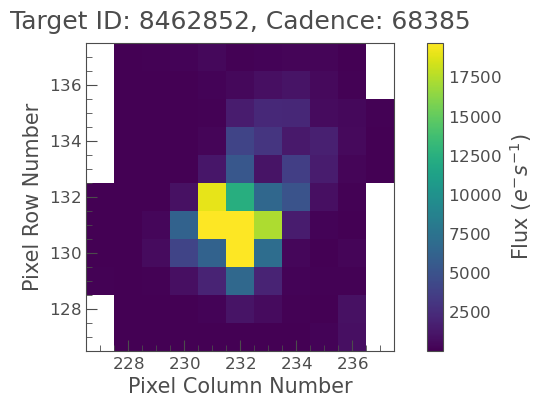

In [4]:
ax = pixelfile.plot(frame=1000)     # this returns a matplotlib Axes
plt.show() 

In [5]:
lc = pixelfile.to_lightcurve(aperture_mask = 'all')

In [11]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

In [12]:
lc.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [13]:
pxlfile = search_targetpixelfile('KIC 6922244', quarter= 4).download()

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [14]:
lc = pxlfile.to_lightcurve(aperture_mask = pxlfile.pipeline_mask)

In [15]:
lc.plot

<bound method LightCurve.plot of <KeplerLightCurve length=45453 LABEL="KIC 6922244" QUARTER=4 CAMPAIGN=None>
       time             flux           flux_err      ... cadenceno quality
                    electron / s     electron / s    ...                  
       Time           float32          float32       ...   int32    int32 
------------------ -------------- ------------------ ... --------- -------
 352.3664488646464  43726.2421875  36.27333450317383 ...    345880       0
 352.3671298512636  43655.1640625  36.25001525878906 ...    345881       0
 352.3678110378751 43717.22265625  36.26811218261719 ...    345882       0
 352.3684921244858   43703.078125 36.264461517333984 ...    345883       0
 352.3691732110965 43723.34765625   36.2672004699707 ...    345884       0
 352.3698542977145 43685.20703125 36.259159088134766 ...    345885       0
352.37053548420954 43664.21484375  36.25700378417969 ...    345886       0
352.37121657082025 43707.32421875  36.27027130126953 ...    345887

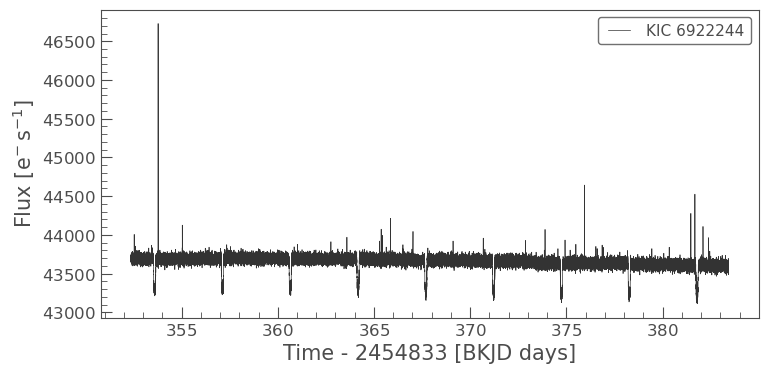

In [25]:
lc.plot()
plt.show()

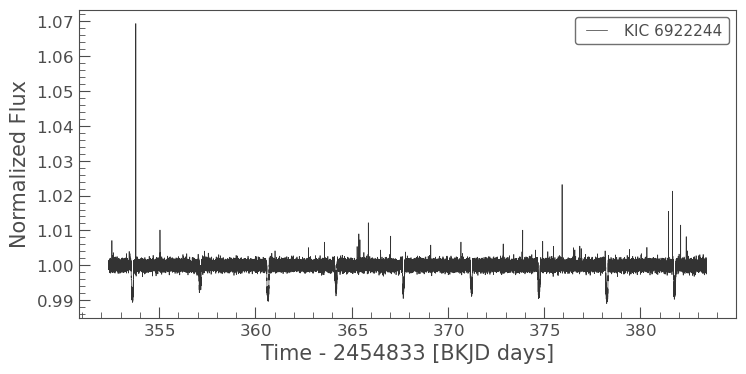

In [26]:
flat_lc = lc.flatten(window_length= 401)
flat_lc.plot()
plt.show()

In [20]:
folded_lc = flat_lc.fold(period = 3.5225)

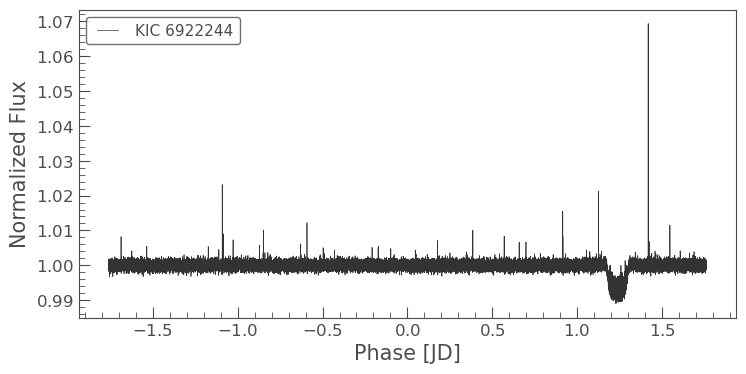

In [24]:
folded_lc.plot()
plt.show()

C:\Users\ishitv\AppData\Local\Temp\ipykernel_32156\4126943331.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


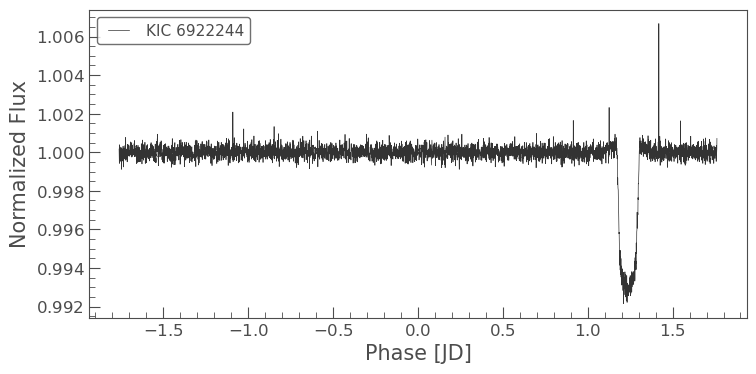

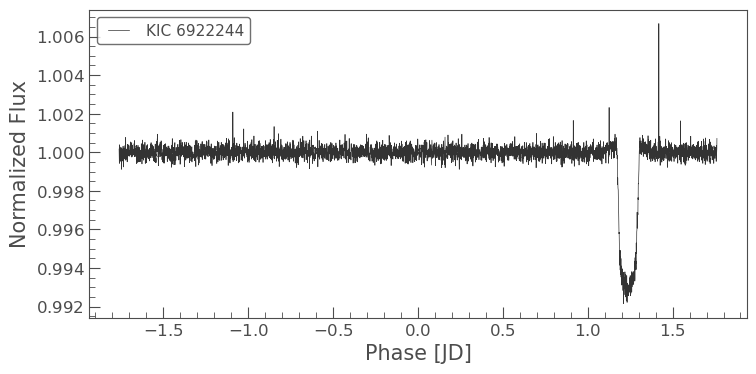

In [28]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot()
plt.show()

C:\Users\ishitv\AppData\Local\Temp\ipykernel_32156\3011496923.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot()


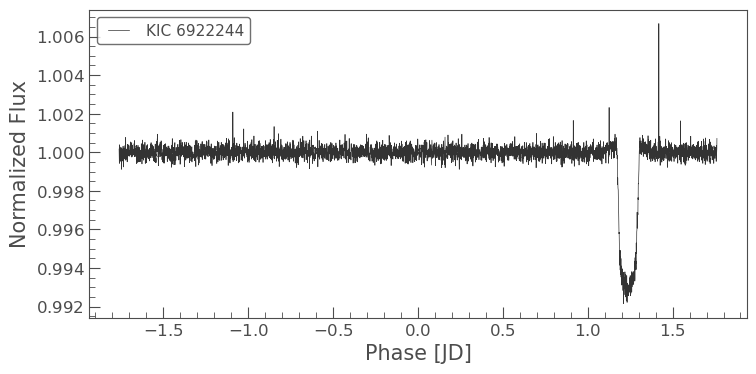

In [31]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot()
plt.show()

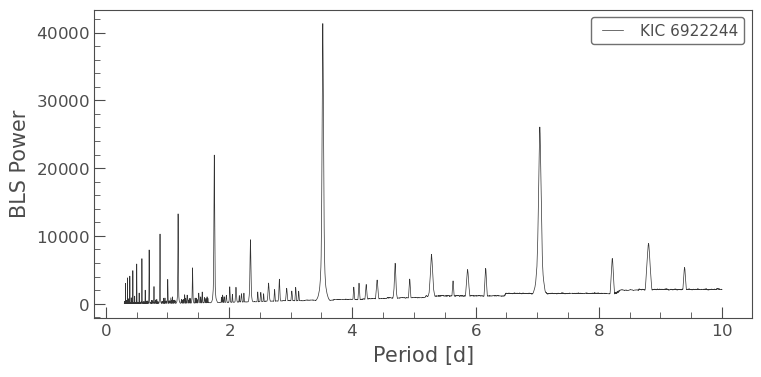

In [34]:
duration = 0.1
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001), duration = 0.1)
periodogram.plot()
plt.show()

In [47]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 3.52200 d


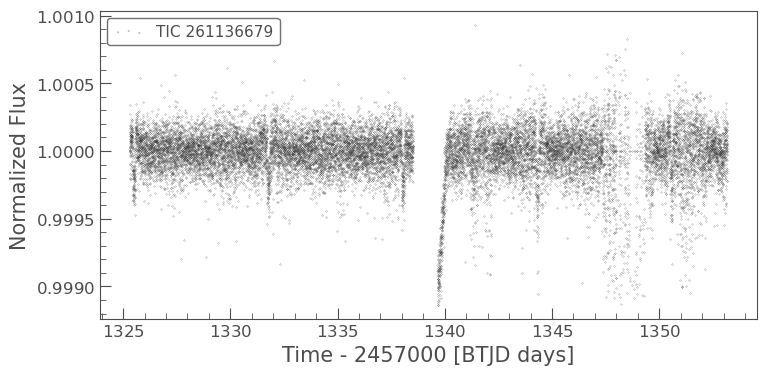

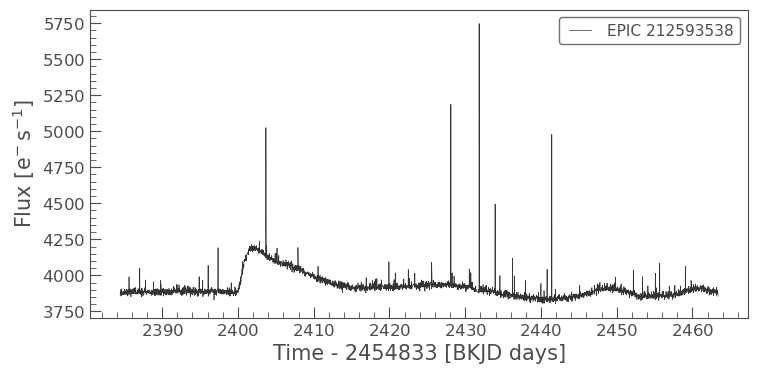

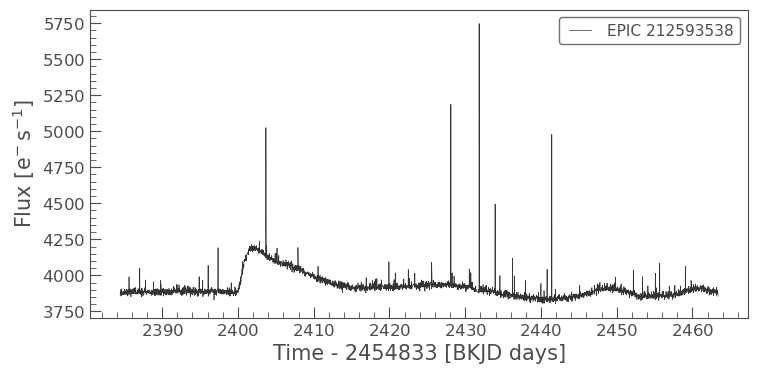

In [49]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot()
plt.show()

In [36]:
import lightkurve as lk

In [38]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [39]:
tpf.mission
tpf.targetid 

261136679

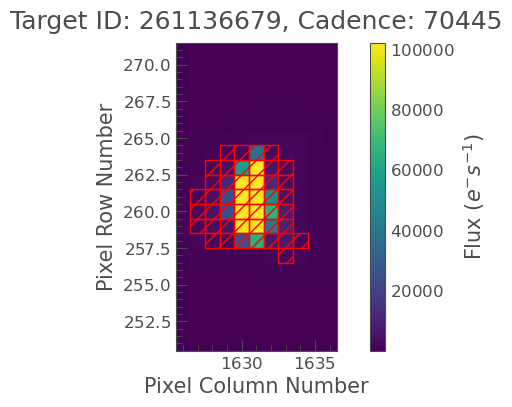

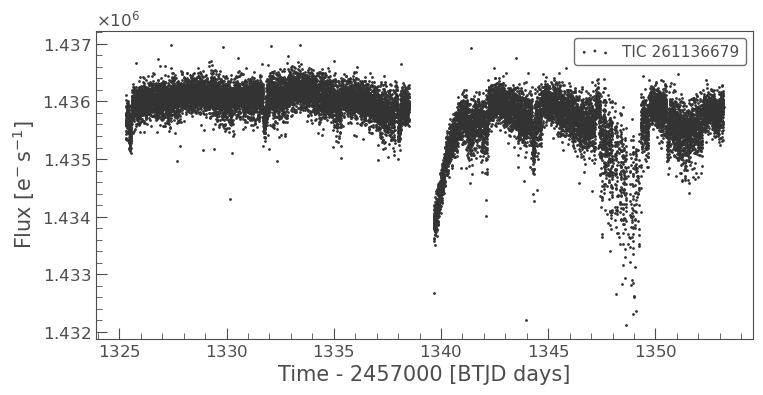

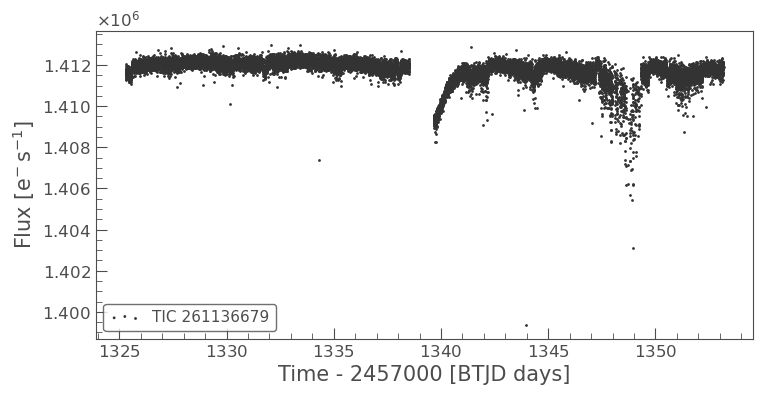

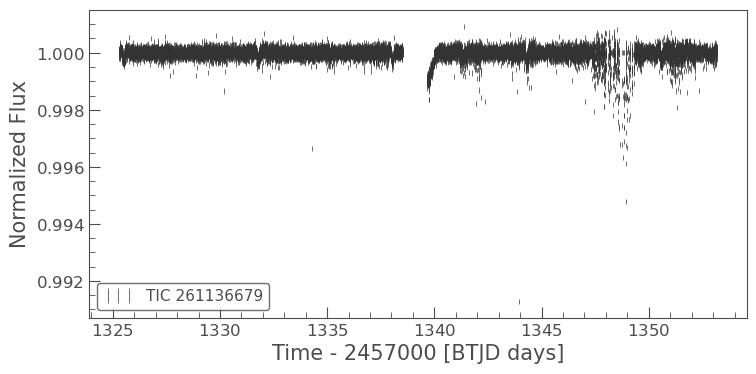

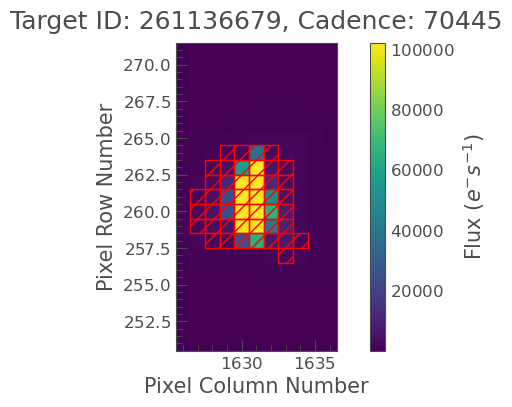

In [45]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

In [41]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [42]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [43]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [46]:
clipped_lc = flat_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

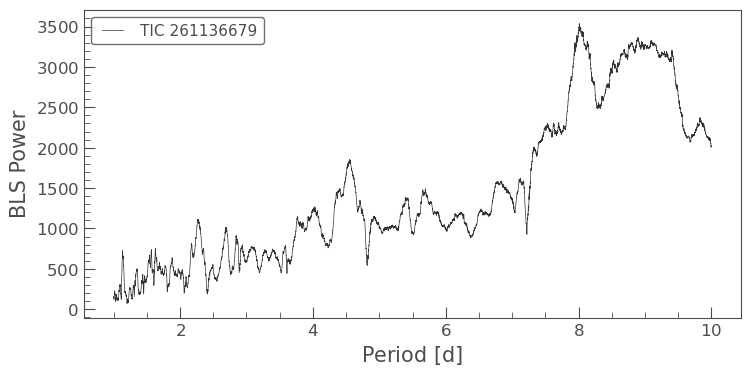

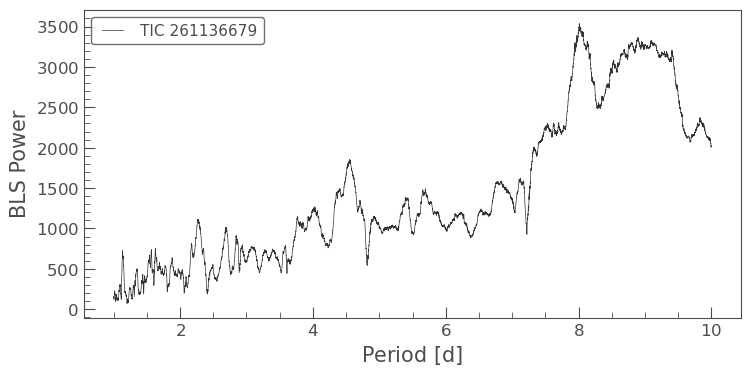

In [51]:
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [52]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 8.010 d


In [53]:
folded_lc = clipped_lc.fold(period=6.300, t0=1325.504)
folded_lc.scatter(s=0.1)

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\astropy\utils\decorators.py:620: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

In [54]:
binned_lc = folded_lc.bin(binsize=10) 
binned_lc.scatter()

C:\Users\ishitv\AppData\Local\Temp\ipykernel_32156\3593698507.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


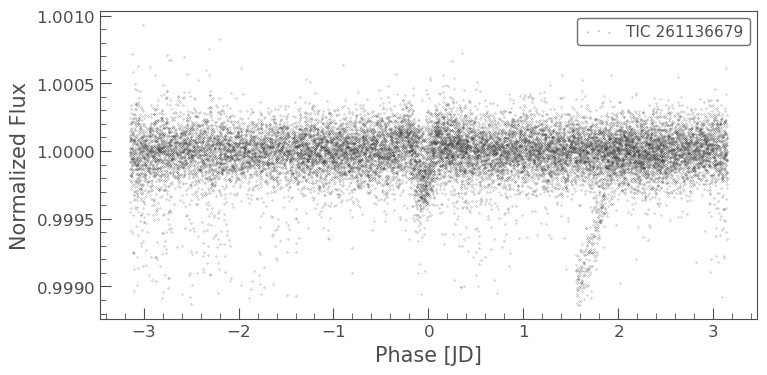

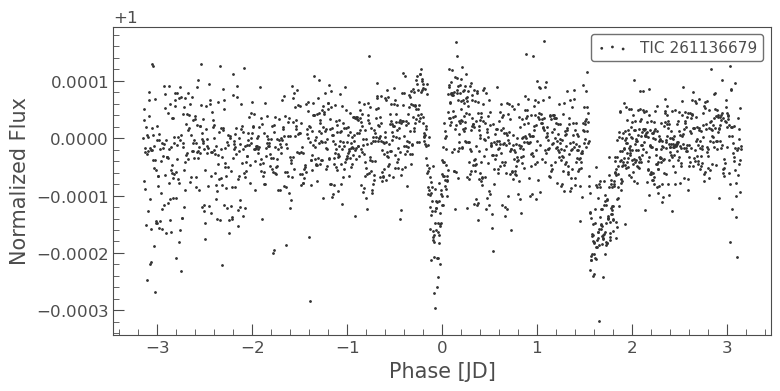

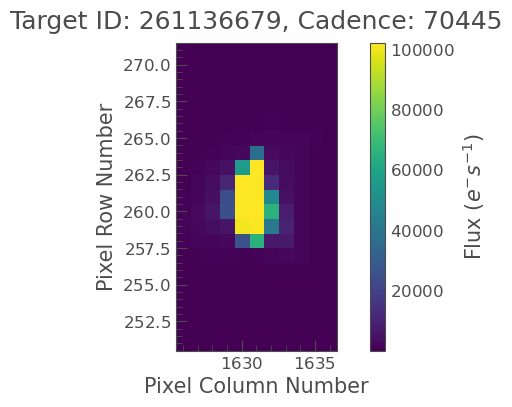

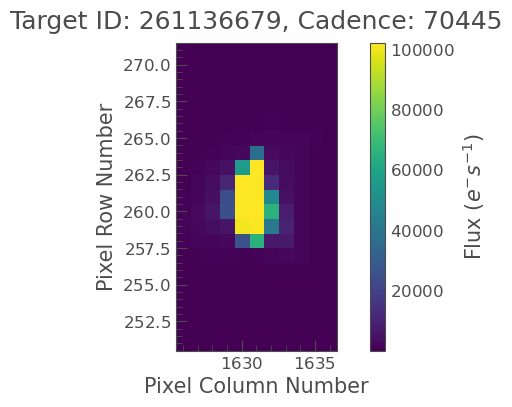

In [60]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')
tpf.plot()
plt.show()

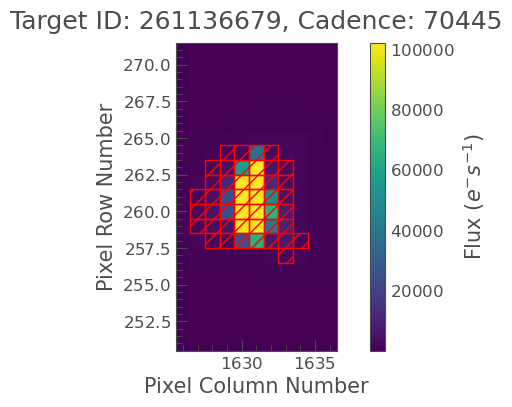

In [61]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

In [62]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [63]:
flat_lc = lc.flatten()
flat_lc.scatter(s=1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

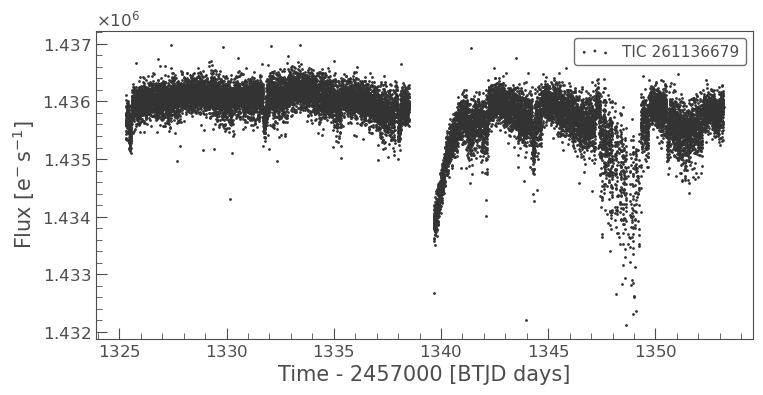

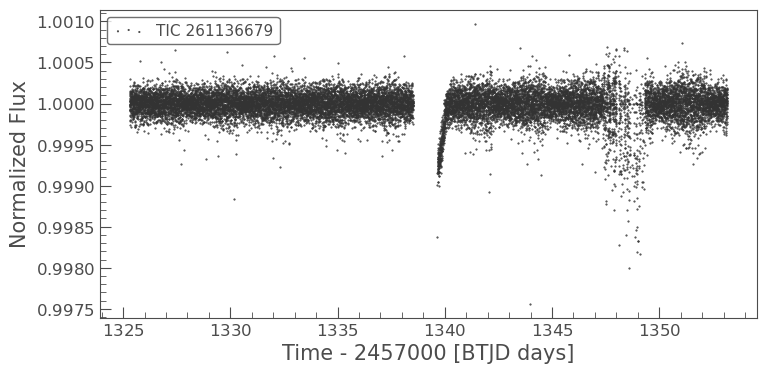

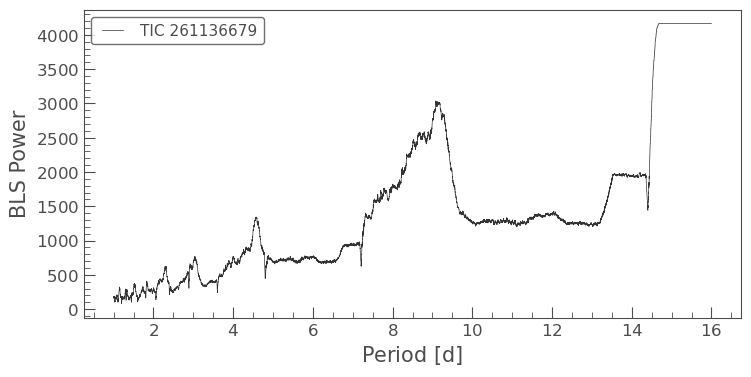

In [64]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 16, 0.001))
periodogram.plot()
plt.show()

In [65]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 15.968 d


c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\astropy\utils\decorators.py:620: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


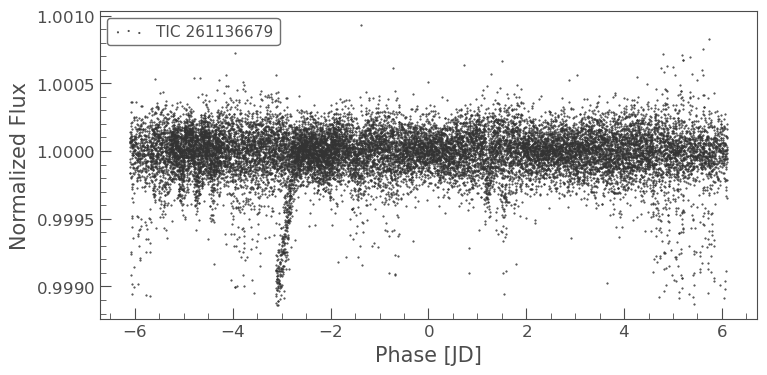

In [69]:
folded_lc = clipped_lc.fold(period=12.223, t0=1355)
folded_lc.scatter(s=1)
plt.show()

C:\Users\ishitv\AppData\Local\Temp\ipykernel_32156\1163268373.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


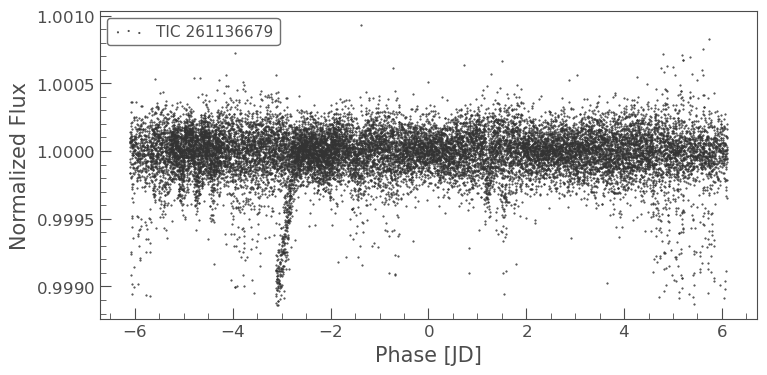

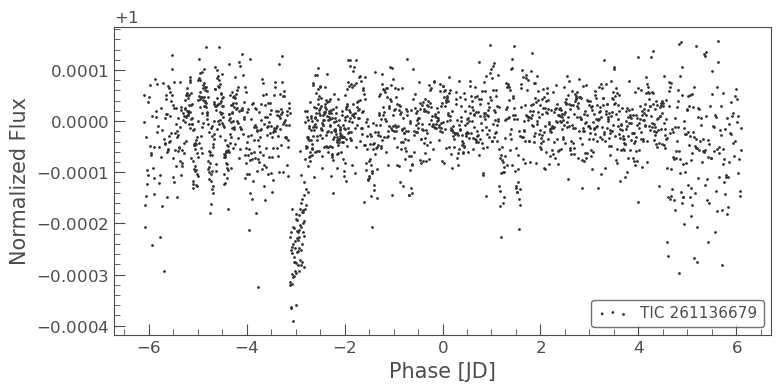

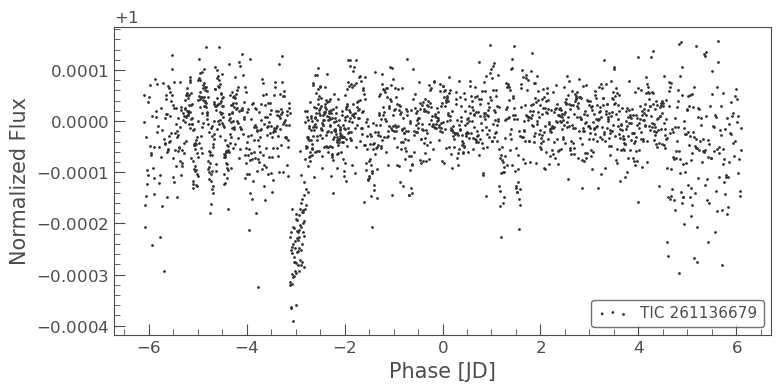

In [68]:
binned_lc = folded_lc.bin(binsize=10) 
binned_lc.scatter()
plt.show()